In [1]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [5]:
#  3. Convert the June temperatures to a list.
June_list=session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_df = pd.DataFrame(June_list, columns=['date','June Temps'])
June_df.set_index(June_df['date'], inplace=True)

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# Design a query to retrieve the last precipitation data for June and plot the results. 
# Perform a query to retrieve the data and precipitation scores
June_prcp=session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
June_prcp_df = pd.DataFrame(June_prcp, columns=['date','precipitation'])
June_prcp_df.set_index(June_prcp_df['date'], inplace=True)
# Sort the dataframe by date
June_prcp_df = June_prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
June_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:xlabel='date'>

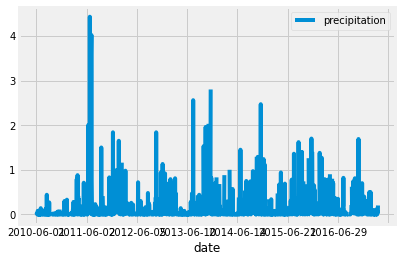

In [9]:
June_prcp_df.plot()

In [10]:
# List the stations and the counts in descending order for month of June
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).filter(extract('month', Measurement.date)==6).all()

[('USC00519397', 236),
 ('USC00519281', 236),
 ('USC00513117', 236),
 ('USC00519523', 232),
 ('USC00516128', 223),
 ('USC00514830', 186),
 ('USC00511918', 165),
 ('USC00517948', 148),
 ('USC00518838', 38)]

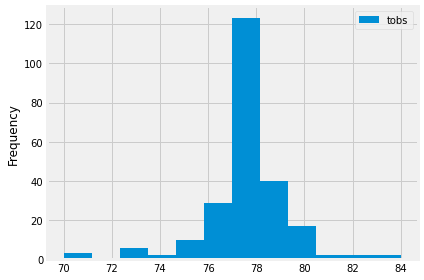

In [11]:
# Choose the station with the highest number of temperature observations.
# Query the month of June of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519397').\
filter(extract('month',Measurement.date) ==6).all()
#print(results)
df = pd.DataFrame(results, columns=['tobs'])
#print(df)
df.plot.hist(bins=12)
plt.tight_layout()

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==1).all()


[('2010-01-01', 65.0),
 ('2010-01-02', 63.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 76.0),
 ('2010-01-06', 73.0),
 ('2010-01-07', 70.0),
 ('2010-01-08', 64.0),
 ('2010-01-09', 68.0),
 ('2010-01-10', 73.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 61.0),
 ('2010-01-14', 66.0),
 ('2010-01-15', 65.0),
 ('2010-01-16', 68.0),
 ('2010-01-17', 64.0),
 ('2010-01-18', 72.0),
 ('2010-01-19', 66.0),
 ('2010-01-20', 66.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 67.0),
 ('2010-01-23', 67.0),
 ('2010-01-24', 71.0),
 ('2010-01-25', 67.0),
 ('2010-01-26', 76.0),
 ('2010-01-27', 68.0),
 ('2010-01-28', 72.0),
 ('2010-01-30', 70.0),
 ('2010-01-31', 67.0),
 ('2011-01-01', 69.0),
 ('2011-01-02', 72.0),
 ('2011-01-03', 74.0),
 ('2011-01-04', 73.0),
 ('2011-01-05', 64.0),
 ('2011-01-06', 65.0),
 ('2011-01-07', 68.0),
 ('2011-01-08', 62.0),
 ('2011-01-09', 58.0),
 ('2011-01-10', 73.0),
 ('2011-01-11', 60.0),
 ('2011-01-13', 68.0),
 ('2011-01-14', 76.0),
 ('2011-01-15', 68.0),
 ('2011-01-16', 66.0),
 ('2011-01-

In [13]:
# 7. Convert the December temperatures to a list.
December_list=session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
December_df = pd.DataFrame(December_list, columns=['date','December Temps'])
December_df.set_index(December_df['date'], inplace=True)

In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
December_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:xlabel='date'>

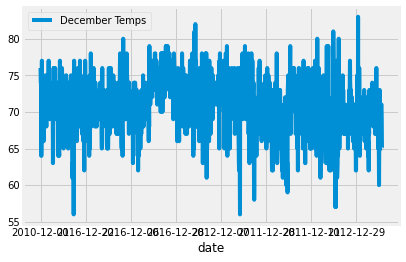

In [16]:
December_df.plot()


In [17]:
# Design a query to retrieve the last precipitation data for December and plot the results. 
# Perform a query to retrieve the data and precipitation scores
December_prcp=session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
Dec_prcp_df = pd.DataFrame(December_prcp, columns=['date','precipitation'])
Dec_prcp_df.set_index(Dec_prcp_df['date'], inplace=True)
# Sort the dataframe by date
Dec_prcp_df = Dec_prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
Dec_prcp_df.describe()


,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:xlabel='date'>

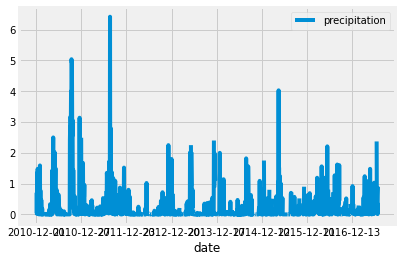

In [18]:
Dec_prcp_df.plot()

In [19]:
# List the stations and the counts in descending order for month of December
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).filter(extract('month', Measurement.date)==1).all()

[('USC00519281', 248),
 ('USC00513117', 246),
 ('USC00519397', 240),
 ('USC00516128', 238),
 ('USC00519523', 234),
 ('USC00514830', 183),
 ('USC00511918', 179),
 ('USC00517948', 91),
 ('USC00518838', 68)]

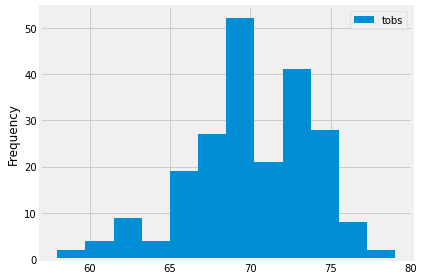

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the December month of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month',Measurement.date) ==12).all()
#print(results)
df = pd.DataFrame(results, columns=['tobs'])
#print(df)
df.plot.hist(bins=12)
plt.tight_layout()